In [3]:
import os
import PIL
from PIL import ImageDraw
import easyocr

image_dir = r"C:\Users\pinac\Downloads\Images_Memes"

# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
reader = easyocr.Reader(['ta','en'])

C:\Users\pinac\anaconda3\envs\trans\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██------------------------------------------------| 5.4% Complete

Progress: |█████---------------------------------------------| 10.9% Complete

Progress: |████████------------------------------------------| 16.3% Complete

Progress: |██████████----------------------------------------| 21.7% Complete

Progress: |█████████████-------------------------------------| 27.1% Complete

Progress: |████████████████----------------------------------| 32.6% Complete

Progress: |███████████████████-------------------------------| 38.0% Complete

Progress: |█████████████████████-----------------------------| 43.4% Complete

Progress: |████████████████████████--------------------------| 48.9% Complete

Progress: |███████████████████████████-----------------------| 54.3% Complete

Progress: |█████████████████████████████---------------------| 59.7% Complete

Progress: |████████████████████████████████------------------| 65.2% Complete

Progress: |███████████████████████████████████---------------| 70.6% Complete

Progress: |██████████████████████████████████████------------| 76.0% Complete

Progress: |████████████████████████████████████████----------| 81.4% Complete

Progress: |███████████████████████████████████████████-------| 86.9% Complete

Progress: |██████████████████████████████████████████████----| 92.3% Complete

Progress: |████████████████████████████████████████████████--| 97.7% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |█-------------------------------------------------| 2.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [4]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='blue', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
#         draw.text((28, 36), "nice Car", fill=(255, 0, 0))
    return image

In [7]:
# Doing OCR. Get bounding boxes.
Text_output = {}
file = []
text = []
for image_filename in os.listdir(image_dir):
    if image_filename.endswith(".jpeg"):
        file.append(image_filename)
        bounds = reader.readtext(os.path.join(image_dir, image_filename))
        temp = ''
        for ind in range(len(bounds)):
                temp = temp + bounds[ind][1]
        text.append(temp)
Text_output["Image_Filename"] = file
Text_output["Extracted_Text"] = text

In [8]:
import pandas as pd
df = pd.DataFrame(Text_output)
df

,Image_Filename,Extracted_Text
0,298729267_3182174545368595_307730986583309107_...,"""மதுவிற்பனையை ஆதார்மூலமாகவிற்பனை செய்ய வேண்டும..."
1,298880334_492286266233544_7882559263857201420_...,யார் இந்த நரேந்திர மோடி?PIJIJJOபொுளாதாரத்தில்ம...
2,299655515_432332332268593_5345719571025532857_...,நமது நாட்டு விவசாயிகளுக்குமனிதநேயத்துடன்கூடிய ...
3,299846490_729762784783405_6529235524283126295_...,
4,299884511_434019648766528_4537306187945897977_...,பொருளாதாரம்Iஎன்னன்னுகேட்டானுங்கள்ல..@thairvada...
5,299899281_436653641857320_8504499540081303525_...,Oneindia Tamiloneindia43 minutes agoஇப்படி ஒரு...
6,299941758_3184341535112079_398498463704791757_...,இந்தியா ஒருDWKயூனியன்தான்!+4|0அரசியலமைப்புச் ச...
7,300046367_434117745423385_4041951551105997170_...,mtmட!!7!@chairvadaio02PTR ஸ்ரீ எங்ககிட்ட வாங்க...
8,300082378_435767448586736_5113941113691634788_...,தழிழ்KAIIபிரதமர் மீது ராகுல் தாக்குகுஜராத் கலவ...
9,300158807_589409486153399_1352929593991031864_...,"""நான் எந்தத் திறன் அடிப்படையில்வேண்டுமானாலும் ..."


In [13]:
import requests
import time

st=time.time()
print(time.time())
translated_text = []
for extracted_text in df["Extracted_Text"]:
    response=requests.post('http://127.0.0.1:8000/batch_translate',json=( {
      "text": extracted_text,
      "language": "ta",
      "auth_token": "2fe23e072a1fc945891778f78acad05b"
    })
    )
    translated_text.append(response.json()["translation"])
df["Translated_Text"] = translated_text

1664536429.641242
<Response [200]>
{'text': '"மதுவிற்பனையை ஆதார்மூலமாகவிற்பனை செய்ய வேண்டும்மது வாங்குபவர்களுக்கு அரசு தரும்உணவுக்கான மானியங்கள்நிறுத்தப்படவேண்டும் மது வாங்க வசதி0ள்ளவர்களால் கண்டிப்பாக உணவும்வாங்கமுடியும் நாம் அவர்களுக்குஇலவசமாக உணவைக்கொடுத்தால் அவர்கள் பணத்தைக்கொடுத்து மது வாங்குகிறார்கள்ரத்தன் டாடாகார்ட்', 'translation': 'We want to make the sale of liquor without Aadhaar, government food subsidies to the buyers should be stopped, people with access to alcohol must buy food, and if we feed them for free, they will pay for the liquor they buy.', 'status': True}
<Response [200]>
{'text': 'யார் இந்த நரேந்திர மோடி?PIJIJJOபொுளாதாரத்தில்முதுகலைபட்டம் பெற்றவரா?நோபல் பரிசு பெற்றவரா?பொருளாதாரத்தில் சிறந்தவரா?தமிழகத்தைவிட பொருளாதாரத்தில்உயர்த்திய வரலாறு இவருக்கு உண்டபா ?எங்களுக்கு அறிவுரை சொல்லமோடிக்கு என்னதகுதியுள்ளது?', 'translation': "Who is Narendra Modi? Do you have a master's degree in economics? Nobel Prize winner? Is it economically sound? Does he have a history of eco

In [14]:
df

,Image_Filename,Extracted_Text,Translated_Text
0,298729267_3182174545368595_307730986583309107_...,"""மதுவிற்பனையை ஆதார்மூலமாகவிற்பனை செய்ய வேண்டும...",We want to make the sale of liquor without Aad...
1,298880334_492286266233544_7882559263857201420_...,யார் இந்த நரேந்திர மோடி?PIJIJJOபொுளாதாரத்தில்ம...,Who is Narendra Modi? Do you have a master's d...
2,299655515_432332332268593_5345719571025532857_...,நமது நாட்டு விவசாயிகளுக்குமனிதநேயத்துடன்கூடிய ...,Humanitarian financial assistance to our farme...
3,299846490_729762784783405_6529235524283126295_...,,
4,299884511_434019648766528_4537306187945897977_...,பொருளாதாரம்Iஎன்னன்னுகேட்டானுங்கள்ல..@thairvada...,"If you ask me about the economy, I will raise ..."
5,299899281_436653641857320_8504499540081303525_...,Oneindia Tamiloneindia43 minutes agoஇப்படி ஒரு...,One such person is OneIndia 43 minutes ago # p...
6,299941758_3184341535112079_398498463704791757_...,இந்தியா ஒருDWKயூனியன்தான்!+4|0அரசியலமைப்புச் ச...,India is a DWKU! + 4 | The solution used in th...
7,300046367_434117745423385_4041951551105997170_...,mtmட!!7!@chairvadaio02PTR ஸ்ரீ எங்ககிட்ட வாங்க...,mtmde! Oh yes!... @ charvadaio02PTR Where to b...
8,300082378_435767448586736_5113941113691634788_...,தழிழ்KAIIபிரதமர் மீது ராகுல் தாக்குகுஜராத் கலவ...,"Rahul Gandhi attacks PM Modi, says those who r..."
9,300158807_589409486153399_1352929593991031864_...,"""நான் எந்தத் திறன் அடிப்படையில்வேண்டுமானாலும் ...","In any capacity, I am the servant of the Gover..."


In [6]:
# count = 0
# for image_filename in os.listdir(image_dir):
#     im = PIL.Image.open(os.path.join(image_dir, image_filename))
#     image = draw_boxes(im, Text_output[image_filename])
#     if not os.path.exists("./output"):
#         os.mkdir("./output")
#     image.save(f"./output/image_{count}.jpg")
#     count += 1

KeyError: '299941758_3184341535112079_398498463704791757_n.jpeg'

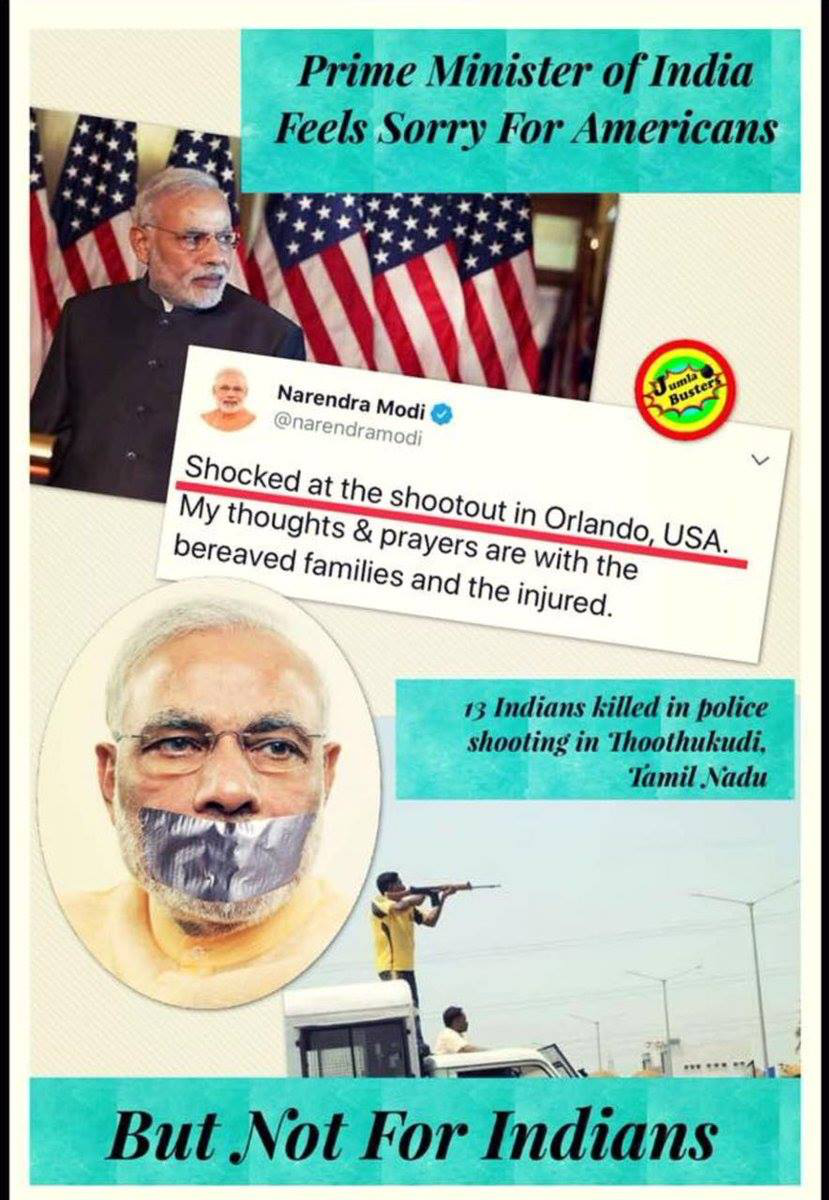

In [7]:
im = PIL.Image.open("../input/new-image/33623577_967505000081452_8230947129317654528_n.jpeg")
im

In [ ]:
output = {}
for image_name in Text_output.keys():
    for ind in range(len(Text_output[image_name])):
        if image_name in output.keys():
            output[image_name] = output[image_name] + Text_output[image_name][ind][1]
        else:
            output[image_name] = Text_output[image_name][ind][1]

In [ ]:
output["299941758_3184341535112079_398498463704791757_n.jpeg"]

In [13]:
max_width = max(len(c_filename) for c_filename in file)
with open('Extracted_text.txt', 'w') as f:
    for ind in range(len(file)):
        f.write(file[ind].ljust(max_width+10)+text[ind])
        f.write('\n')